## Declaração do Problema

O desafio foi retirado do Kaggle cujo objetivo é construir um modelo que preveja as vendas com base no dinheiro gasto em diferentes plataformas de marketing.
Link: https://www.kaggle.com/ashydv/sales-prediction-simple-linear-regression/data?select=advertising.csv

## Dados
Usarei o conjunto de dados de publicidade fornecido no ISLR e analise a relação entre 'publicidade na TV' e 'vendas' usando um modelo de regressão linear simples.
Neste documento, construirei um modelo de regressão linear para prever as vendas usando uma variável preditora apropriada.

# Importando Bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# Importando a base de dados

### Visão geral

Os dados foram divididos em dois grupos:

conjunto de treinamento (train.csv)
conjunto de teste (test.csv)
O conjunto de treinamento deve ser usado para criar os modelos de aprendizado de máquina. Para o conjunto de treinamento, fornecemos o resultado (também conhecido como “ground truth”) para cada passageiro. O modelo será baseado em “features” como gênero e classe dos passageiros.

O conjunto de testes deve ser usado para ver o desempenho do modelo em dados não vistos. Para o conjunto de teste, não é fornecido o "“ground truth” para cada passageiro. O objetivo é prever esses resultados. Para cada passageiro no conjunto de teste, o modelo treinado deve ser utilizado para prever se eles sobreviveram ou não ao naufrágio do Titanic.


In [8]:
advertising = pd.read_csv('advertising.csv', sep=',')
display(advertising)
advertising.info()
advertising.describe()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


### Análise de outliers


In [17]:
# definindo a função de limites

def limites(coluna):
    q1 = coluna.quantile(0.25)
    q3 = coluna.quantile(0.75)
    amplitude = q3 - q1
    return q1-1.5*amplitude, q3+1.5*amplitude 


In [18]:
# definindo a função dos gráficos de caixa

def diagrama_caixa(coluna):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(15, 5)
    sns.boxplot(x=coluna, ax=ax1)
    ax2.set_xlim(limites(coluna))
    sns.boxplot(x=coluna, ax=ax2)

def histograma(coluna):
    plt.figure(figsize=(15,5))
    sns.distplot(coluna, hist=True)

### TV

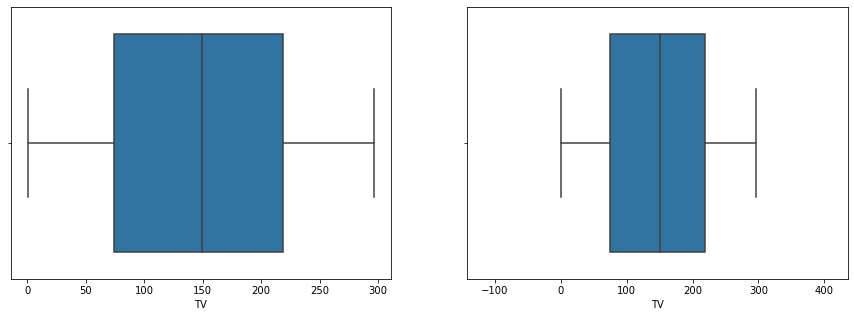

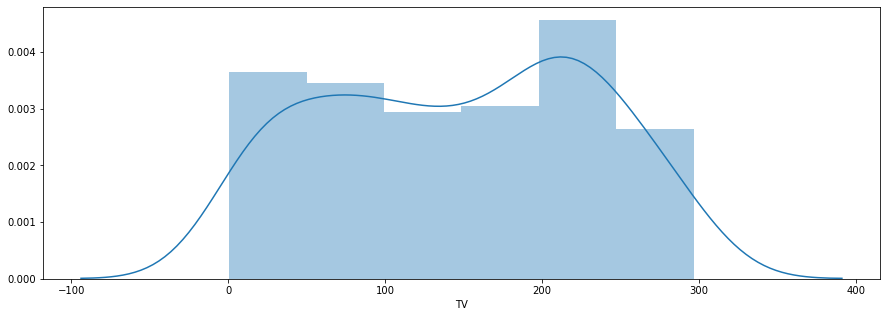

In [16]:
diagrama_caixa(advertising['TV'])
histograma(advertising['TV'])

### Radio

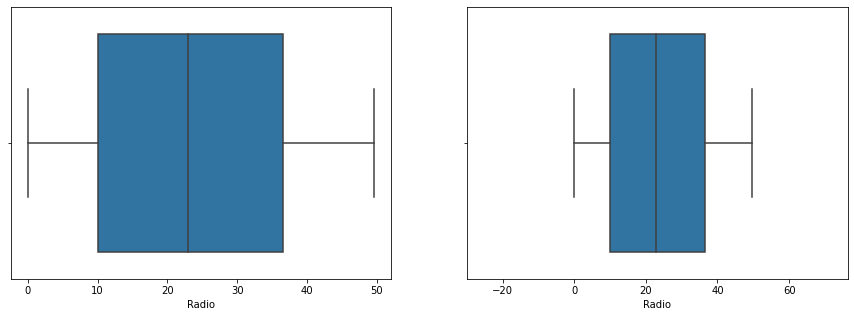

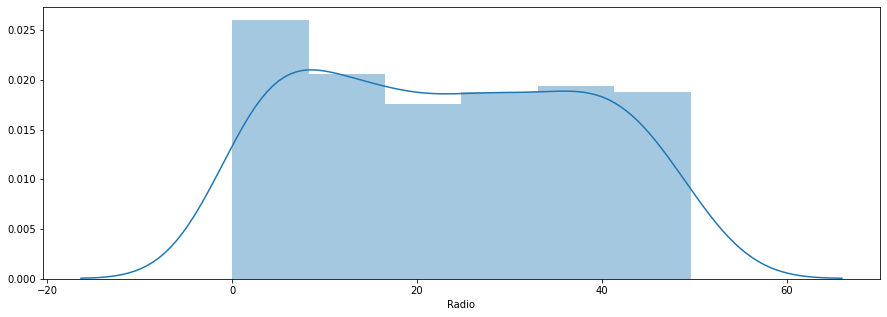

In [19]:
diagrama_caixa(advertising['Radio'])
histograma(advertising['Radio'])

### Newspaper

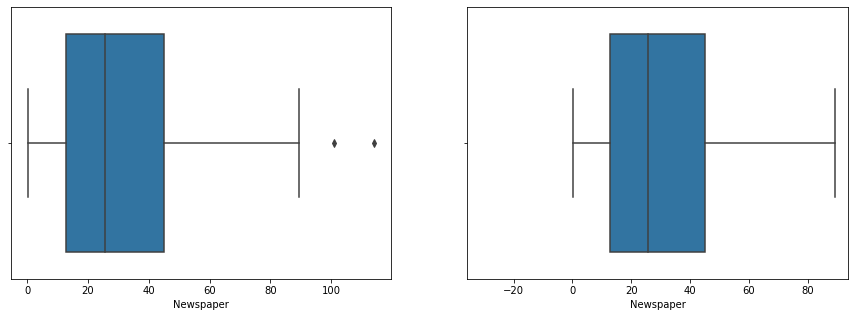

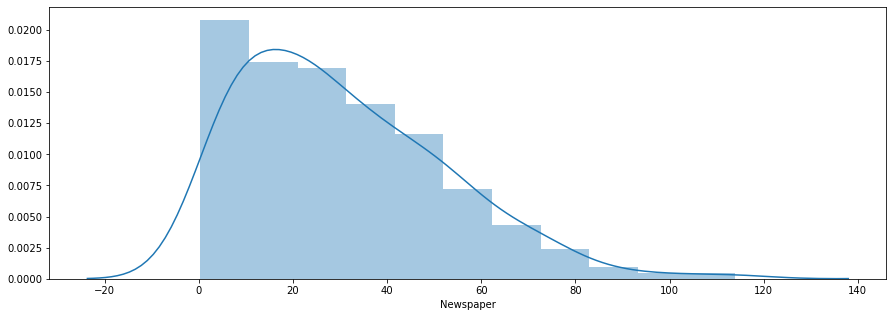

In [20]:
diagrama_caixa(advertising['Newspaper'])
histograma(advertising['Newspaper'])

Analisando todas as features, posso concluir que não é necessário excluir outliers. Optei por esse caminho, pois não existem valores muitos diferentes do normal que possam atrapalhar o modelo de previsão. 
Optaria por excluir se em algumas das features tivesse alguns investimentos fora dos valores normais. Esses sim poderiam atrapalhar o modelo. 

### Análise Exploratória

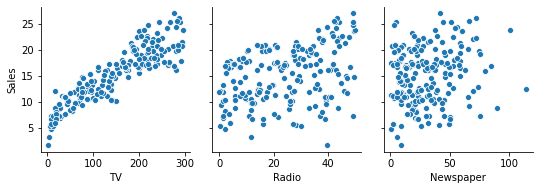

In [21]:
sns.pairplot(advertising, x_vars=['TV','Radio','Newspaper'], y_vars=['Sales'], kind='scatter')
plt.show()

In [ ]:
Analisando os três gráficos podemos ver que o primeiro tem uma tendência de crescimento, ou seja, quando mais investimentos em TV, maior será a venda.
Já os outros dois possuem valores dispersos. Eles não seguem um padrão. 

- Nesta parte vou analisar coluna por coluna vendo a correlação entre elas e decidir se retiro ou mantenho alguma. 

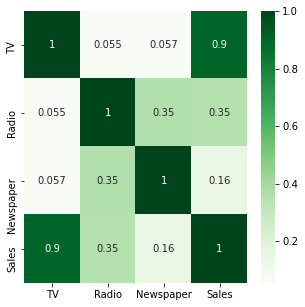

In [13]:
plt.figure(figsize = (5,5))
sns.heatmap(advertising.corr(),annot = True,cmap = 'Greens')

O gráfico acima indica a relação entre as colunas. Quanto mais próximo de 1 o valor, mais correlacionadas as features estão. 
Respondendo a indagação feita no início sobre a relação entre TV e Vendas(Sales), vemos que ela é muito forte (0,9). Este dado reforça o que vimos nos gráficos de dispersão acima. Diferente dos Jornais(Newspaper), que tem um valor baixo na correlação. 

Alguns insights podem ser feitos a partir deste gráfico:
- Quanto mais investimos em TV, maior é o retorno das vendas. Isso acontece, pois atualmente temos um grande número de pessoas que assistem TV no dia a dia. 
- Já os investimentos em Rádio e Jornais não são tão bons, pois os valores são baixos (0,35 e 0,16 respectivamente). O jornal devido ao aumento da tecnologia que levou as pessoas a lerem notícias em internet e celular, diminuindo muito o número de compradores de jornais. O rádio por sua vez é um veículo antigo. Atualmente temos pessoas vendo mais televisões do que escutando rádio. 

Por conclusão, usarei a feature TV como variável de recurso. 

### Construção do Modelo

Nesta etapa eu atribuo a variável de recurso (X), que no caso é a TV. Além da variável de resposta (y), Sales.

Depois disso eu divido as variáveis em treinamento e teste. Para isso eu import o train_test_split da biblioteca sklearn.model_selection. 
Deixo 70% dos dados para treino e 30% para teste.

In [32]:
from sklearn.model_selection import train_test_split

X = np.array(advertising['TV'])
y = np.array(advertising['Sales'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### Importando os modelos 

Para este caso vou importar dois tipos de modelo:
    1. Linear Regression 
    2. Random Forest

Optei por esses dois por ser um modelo de regressão e acredito que sejam ideias para os casos. 
Testarei ambos e decidirei qual deles é o melhor avaliando duas métricas que vou estabelecer. R² e RMSE (Erro Quadrático Médio)

In [42]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

#criando o modelo
linear = LinearRegression()
random_forest = RandomForestRegressor()
extra_trees = ExtraTreesRegressor()

#treinando o modelo
linear.fit(X_train.reshape(-1,1), y_train)
random_forest.fit(X_train.reshape(-1,1), y_train)
extra_trees.fit(X_train.reshape(-1,1), y_train)

#testando o modelo
teste_linear = linear.predict(X_test.reshape(-1,1))
teste_random_forest = random_forest.predict(X_test.reshape(-1,1))
teste_extra_trees = extra_trees.predict(X_test.reshape(-1,1))

#métricas R² e RSME
r2_linear = metrics.r2_score(y_test, teste_linear)
r2_random = metrics.r2_score(y_test, teste_random_forest)
r2_ext = metrics.r2_score(y_test, teste_extra_trees)
print(f'R² linear: {r2_linear:.2%} / R² random forest: {r2_random:.2%} / R² extra trees: {r2_ext:.2%}')

mse_linear = metrics.mean_squared_error(y_test, teste_linear)
mse_random = metrics.mean_squared_error(y_test, teste_random_forest)
mse_ext = metrics.mean_squared_error(y_test, teste_extra_trees)
print(f'MSE linear: {mse_linear:.2f} / MSE random forest: {mse_random:.2f} / MSE extra trees: {mse_ext:.2f}')

R² linear: 79.85% / R² random forest: 77.30% / R² extra trees: 71.88%
MSE linear: 5.14 / MSE random forest: 5.79 / MSE extra trees: 7.18


Baseando-se no resultado acima, definimos que o melhor modelo é o de Regressão Linear, pois ele tem uma maior porcentagem de R²(quanto dos valores o modelo consegue explicar) e o menor valor de MSE(quanto o modelo erra)

R² linear: 79.85% <br>
MSE linear: 5.14 

### Comparando os valores 

In [47]:
comparacao = pd.DataFrame()
comparacao['Sales Real'] = y_test
comparacao['Previsao Linear'] = teste_linear

comparacao = comparacao.reset_index(drop=True)
comparacao.head()


,Sales Real,Previsao Linear
0,23.8,18.637321
1,16.6,18.175337
2,11.9,12.230768
3,19.8,22.500178
4,17.6,21.030734


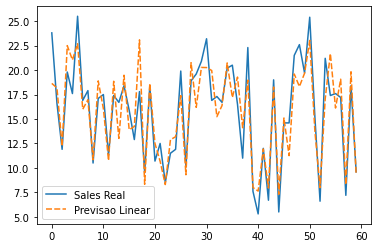

In [48]:
sns.lineplot(data=comparacao)
plt.show()

A tabela de comparação, como já diz o nome, compara os valores de Sales Reais com os valores da Previsão Linear. Fazendo uma análise dos 4 primeiros valores, percebe-se que os valores não são muitos distantes um do outro.
Para visualizar melhor, plotei o gráfico com duas linhas para comparar essas diferenças. Dá pra perceber que as linhas acompanham uma a outra. 

Por conclusão, pode-se dizer que o modelo está com uma boa precisão. 